In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aicontent/ai_content.csv


In [5]:
import torch
print("torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("Device count:", torch.cuda.device_count())
    try:
        print("Device name:", torch.cuda.get_device_name(0))
    except Exception as e:
        print("Couldn't get device name:", e)


torch version: 2.8.0+cu126
CUDA available: True
Device count: 1
Device name: Tesla P100-PCIE-16GB


In [22]:
import os
print("Top-level /kaggle/input folders:")
print(os.listdir('/kaggle/input')[:50])

Top-level /kaggle/input folders:
['aicontent']


In [23]:
import pandas as pd
path=f"/kaggle/input/aicontent/ai_content.csv"

df=pd.read_csv(path)
print("Shape:",df.shape)
print("Columns:",df.columns)
df.head()

Shape: (10000, 8)
Columns: Index(['index', 'text', 'label', 'source', 'text_word_count', 'label_cat',
       'source_int', 'processed_text'],
      dtype='object')


,index,text,label,source,text_word_count,label_cat,source_int,processed_text
0,47,All the Love you do not see\n\nOn writing with...,0,medium,236,human,0,love see write heart hope photo joshua coleman...
1,85,"Reading, writing and displaying images\n\nBefo...",0,medium,386,human,0,read write display image anything computer vis...
2,255,Why I Think “Target Audience” Doesn’t Always M...,0,medium,323,human,0,think target audience always matter much first...
3,268,"All sorts of books are published every year, a...",0,medium,176,human,0,sort book publish every year sort bookbuyers l...
4,315,Finding The Right Question Not Answer\n\nWhen ...,0,medium,264,human,0,find right question answer face problem one fi...


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            10000 non-null  int64 
 1   text             10000 non-null  object
 2   label            10000 non-null  int64 
 3   source           10000 non-null  object
 4   text_word_count  10000 non-null  int64 
 5   label_cat        10000 non-null  object
 6   source_int       10000 non-null  int64 
 7   processed_text   10000 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.1+ KB


In [25]:
df=df[['text','label']]
df.head()

,text,label
0,All the Love you do not see\n\nOn writing with...,0
1,"Reading, writing and displaying images\n\nBefo...",0
2,Why I Think “Target Audience” Doesn’t Always M...,0
3,"All sorts of books are published every year, a...",0
4,Finding The Right Question Not Answer\n\nWhen ...,0


In [26]:
print("Missing values:")
print(df.isnull().sum())


Missing values:
text     0
label    0
dtype: int64


In [27]:
df["label"].value_counts()


label
0    5000
1    5000
Name: count, dtype: int64

In [28]:
df["text_length"] = df["text"].astype(str).apply(len)
df["word_count"] = df["text"].astype(str).apply(lambda x: len(x.split()))

df[["text_length", "word_count"]].describe()


,text_length,word_count
count,10000.000000,10000.000000
mean,1604.312900,274.620300
std,764.389925,126.197044
min,238.000000,51.000000
25%,951.750000,162.000000
50%,1696.000000,286.000000
75%,2207.000000,395.000000
max,14733.000000,639.000000


In [29]:
print("Shortest texts:")
print(df.sort_values("word_count").head(5)[["text", "word_count"]])

print("\nLongest texts:")
print(df.sort_values("word_count", ascending=False).head(5)[["text", "word_count"]])


Shortest texts:
                                                   text  word_count
9862  birthday girl lucks out with chaplin and kidma...          51
7130  a pleasant enough romance with intellectual un...          51
9277  The measurement of the dimensional changes can...          51
5312  quitting delivers a sucker-punch , and its imp...          51
7116  shreve's graceful dual narrative gets clunky o...          51

Longest texts:
                                                   text  word_count
4231  The following is a list of articles about recu...         639
1170  Australia’s consumer watchdog launched legal a...         575
456   Photo by Marc-Olivier Jodoin on Unsplash\n\nWe...         567
2619  I sit in front of the blank white screen\n\nin...         565
1191  學習開發 iOS App 時，很多元件都要透過 array 設定顯示的內容，比方 Swift...         558


In [30]:
df = df.dropna()

df["text"] = df["text"].astype(str) 

df = df[df["text"].str.strip() != ""]

print("After cleaning shape:", df.shape)


After cleaning shape: (10000, 4)


In [31]:
df["label"] = df["label"].astype(int)
df["label"].value_counts()


label
0    5000
1    5000
Name: count, dtype: int64

In [32]:
df = df[["text", "label"]]
df.head()


,text,label
0,All the Love you do not see\n\nOn writing with...,0
1,"Reading, writing and displaying images\n\nBefo...",0
2,Why I Think “Target Audience” Doesn’t Always M...,0
3,"All sorts of books are published every year, a...",0
4,Finding The Right Question Not Answer\n\nWhen ...,0


In [33]:

df["text"] = (
    df["text"].astype(str)
      .str.replace("\n\n", " ")  
      .str.replace("\n", " ")     
                     
)

df = df[df["text"].str.strip() != ""]
print("After cleaning shape:", df.shape)




After cleaning shape: (10000, 2)


In [34]:
df.head

<bound method NDFrame.head of                                                    text  label
0     All the Love you do not see On writing with he...      0
1     Reading, writing and displaying images Before ...      0
2     Why I Think “Target Audience” Doesn’t Always M...      0
3     All sorts of books are published every year, a...      0
4     Finding The Right Question Not Answer When fac...      0
...                                                 ...    ...
9995  when not wallowing in its characters' frustrat...      1
9996  a movie that's held captive by mediocrity . no...      1
9997  got a david lynch jones ? then you'd do well t...      1
9998  an incredibly low-rent danish film , it brings...      1
9999  it provides the grand , intelligent entertainm...      1

[10000 rows x 2 columns]>

In [35]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

df['label'] = df['label'].astype(int)

temp_df, test_df = train_test_split(
    df,
    test_size=0.15,
    stratify=df['label'],
    random_state=RANDOM_STATE
)

val_size = 0.15 / 0.85
train_df, val_df = train_test_split(
    temp_df,
    test_size=val_size,
    stratify=temp_df['label'],
    random_state=RANDOM_STATE
)

train_df = train_df.reset_index(drop=True)
val_df   = val_df.reset_index(drop=True)
test_df  = test_df.reset_index(drop=True)

print(f"Total: {len(df)}")
print(f"Train: {len(train_df)} ({len(train_df)/len(df):.2%})")
print(f"Val:   {len(val_df)} ({len(val_df)/len(df):.2%})")
print(f"Test:  {len(test_df)} ({len(test_df)/len(df):.2%})\n")

print("Class balance (train):")
print(train_df['label'].value_counts(normalize=True))
print("\nClass balance (val):")
print(val_df['label'].value_counts(normalize=True))
print("\nClass balance (test):")
print(test_df['label'].value_counts(normalize=True))


Total: 10000
Train: 7000 (70.00%)
Val:   1500 (15.00%)
Test:  1500 (15.00%)

Class balance (train):
label
0    0.5
1    0.5
Name: proportion, dtype: float64

Class balance (val):
label
0    0.5
1    0.5
Name: proportion, dtype: float64

Class balance (test):
label
1    0.5
0    0.5
Name: proportion, dtype: float64


In [37]:
print("Validation set size:", len(train_df))

print("\nValidation label counts:")
print(train_df['label'].value_counts())

print("\nValidation label percentages:")
print(train_df['label'].value_counts(normalize=True) * 100)


Validation set size: 7000

Validation label counts:
label
0    3500
1    3500
Name: count, dtype: int64

Validation label percentages:
label
0    50.0
1    50.0
Name: proportion, dtype: float64


In [38]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer, RobertaModel

MAX_LEN = 512           
BATCH_SIZE = 16          
MODEL_NAME = 'roberta-base'

tokenizer = RobertaTokenizer.from_pretrained(MODEL_NAME)

class AIContentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
        
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,    
            max_length=self.max_len,
            padding='max_length',       
            truncation=True,            
            return_attention_mask=True, 
            return_tensors='pt'        
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

train_dataset = AIContentDataset(train_df.text.to_numpy(), train_df.label.to_numpy(), tokenizer, MAX_LEN)
val_dataset = AIContentDataset(val_df.text.to_numpy(), val_df.label.to_numpy(), tokenizer, MAX_LEN)
test_dataset = AIContentDataset(test_df.text.to_numpy(), test_df.label.to_numpy(), tokenizer, MAX_LEN)

2026-01-18 13:39:57.807907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768743598.181939      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768743598.290757      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768743599.150435      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768743599.150486      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768743599.150489      55 computation_placer.cc:177] computation placer alr

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

In [42]:
sample_item = train_dataset[100]

print("--- Dataset Output Keys ---")
print(sample_item.keys())

print("\n--- Input IDs (First 30 tokens) ---")
print(sample_item['input_ids'][:30])

print("\n--- Attention Mask (First 30 tokens) ---")
print(sample_item['attention_mask'][:30])

print("\n--- Label ---")
print(f"Value: {sample_item['labels'].item()} (Type: {sample_item['labels'].dtype})")


decoded_text = tokenizer.decode(sample_item['input_ids'])
print("\n--- Decoded Text (Truncated) ---")
print(decoded_text[:500] + "...")

--- Dataset Output Keys ---
dict_keys(['input_ids', 'attention_mask', 'labels'])

--- Input IDs (First 30 tokens) ---
tensor([    0,   133,   272,    12,   844,    44,    48, 26121,  5564,  4990,
          609,    17,    46,   126,  2885,     7, 11526,   632,   776,  1986,
           17,    27,  3038,    15,    97,   749,     8,    15,   720,   434])

--- Attention Mask (First 30 tokens) ---
tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1])

--- Label ---
Value: 1 (Type: torch.int64)

--- Decoded Text (Truncated) ---
<s>The G-20 “mutual assessment process” – established to analyze national economic policies’ effects on other countries and on global growth, with the goal of formulating individual adjustment commitments – has highlighted the difficulty of reaching agreement on macroeconomic policies with significant spillover effects. Indeed, it is even more difficult than reaching trade agreements, which must cover issues like tar

In [43]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)

print("Batch check:")
sample_batch = next(iter(train_loader))
print(f"Input IDs shape: {sample_batch['input_ids'].shape}")  
print(f"Mask shape:      {sample_batch['attention_mask'].shape}")
print(f"Labels shape:    {sample_batch['labels'].shape}")        

Batch check:
Input IDs shape: torch.Size([16, 512])
Mask shape:      torch.Size([16, 512])
Labels shape:    torch.Size([16])


In [44]:
from torch import nn

class RoBERTaClassifier(nn.Module):
    def __init__(self, n_classes):
        super(RoBERTaClassifier, self).__init__()
        self.roberta = RobertaModel.from_pretrained(MODEL_NAME) 
        
        self.drop = nn.Dropout(p=0.3) 
        
        self.out = nn.Linear(self.roberta.config.hidden_size, n_classes)
        
    def forward(self, input_ids, attention_mask):
        outputs = self.roberta(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        last_hidden_state = outputs.last_hidden_state
        
        cls_token_embedding = last_hidden_state[:, 0, :]
        
        output = self.drop(cls_token_embedding)
        return self.out(output)
  

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RoBERTaClassifier(n_classes=2)
model = model.to(device)

print("Model initialized and moved to:", device)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model initialized and moved to: cuda


In [46]:
from transformers import get_linear_schedule_with_warmup
from torch.optim import AdamW

EPOCHS = 2
LEARNING_RATE = 1e-5 
WEIGHT_DECAY = 0.01 
optimizer = AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)

total_steps = len(train_loader) * EPOCHS
num_warmup_steps = int(0.1 * total_steps) 

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=num_warmup_steps,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [48]:
import numpy as np

def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
    model = model.train() 
    
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        targets = d["labels"].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs, dim=1)
        
        loss = loss_fn(outputs, targets)
        
        correct_predictions += torch.sum(preds == targets)
        losses.append(loss.item())
        
        loss.backward()
        
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
        
    return correct_predictions.double() / n_examples, np.mean(losses)

# Function to evaluate model
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval() 
    
    losses = []
    correct_predictions = 0
    
    with torch.no_grad(): 
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["labels"].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs, dim=1)
            
            loss = loss_fn(outputs, targets)
            
            correct_predictions += torch.sum(preds == targets)
            losses.append(loss.item())
            
    return correct_predictions.double() / n_examples, np.mean(losses)

In [49]:
from collections import defaultdict

history = defaultdict(list)
best_accuracy = 0

print("Starting training...")

for epoch in range(EPOCHS):
    
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    
    # 1. Train
    train_acc, train_loss = train_epoch(
        model,
        train_loader,
        loss_fn,
        optimizer,
        device,
        scheduler,
        len(train_dataset)
    )
    
    print(f'Train loss {train_loss} accuracy {train_acc}')
    
    # 2. Validate
    val_acc, val_loss = eval_model(
        model,
        val_loader,
        loss_fn,
        device,
        len(val_dataset)
    )
    
    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()
    
    # 3. Save History
    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    
    # 4. Save best model state
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc

Starting training...
Epoch 1/2
----------
Train loss 0.16539293138729794 accuracy 0.9228571428571429
Val   loss 0.022195436357930143 accuracy 0.994

Epoch 2/2
----------
Train loss 0.008352152845063382 accuracy 0.9978571428571429
Val   loss 0.02611277629643774 accuracy 0.9953333333333333



Evaluating on Test Set...

 FINAL TEST METRICS
Accuracy:  0.9980000000
Precision: 0.9980079681
Recall:    0.9980000000
F1 Score:  0.9979999920


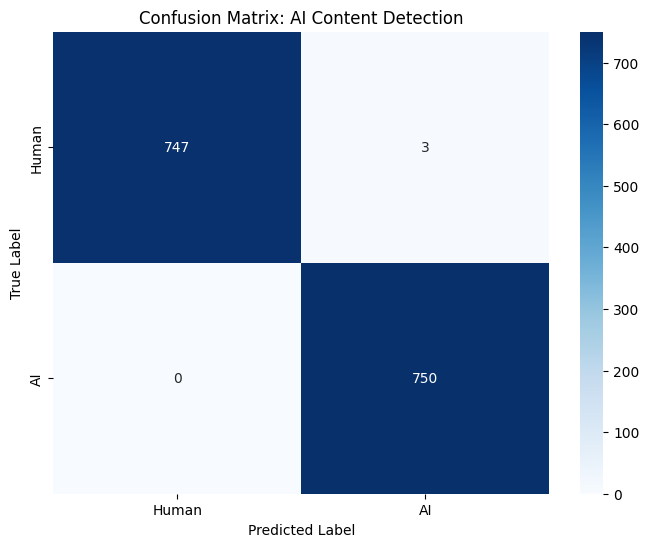

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import torch

# 1. Load the best weights
model.load_state_dict(torch.load('best_model_state.bin'))
model = model.to(device)

# 2. Function to get predictions
def get_predictions(model, data_loader):
    model = model.eval()
    predictions = []
    real_values = []

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            targets = d["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs, dim=1)

            predictions.extend(preds)
            real_values.extend(targets)

    predictions = torch.stack(predictions).cpu()
    real_values = torch.stack(real_values).cpu()
    return predictions, real_values

# 3. Generate Predictions
print("Evaluating on Test Set...")
y_pred, y_test = get_predictions(model, test_loader)

print("\n" + "="*20)
print(" FINAL TEST METRICS")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.10f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.10f}")
print(f"Recall:    {recall_score(y_test, y_pred, average='weighted'):.10f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, average='weighted'):.10f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Human', 'AI'], 
            yticklabels=['Human', 'AI'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: AI Content Detection')
plt.show()